<a href="https://colab.research.google.com/github/yara-esmaiel/yara-esmaiel/blob/main/YARA_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/meetnagadia/bitcoin-price-prediction-using-lstm

In [68]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [69]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')

In [70]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2806
Total number of fields present in the dataset:  7


In [71]:
maindf.shape

(2806, 7)

In [72]:
maindf.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [73]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2801,2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707
2802,2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,29200.740234,30749382605
2803,2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,29432.226563,17274840442
2804,2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270
2805,2022-05-23,30254.687500,30589.654297,30070.345703,30204.857422,30204.857422,26184398848


In [74]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2806 non-null   object 
 1   Open       2806 non-null   float64
 2   High       2806 non-null   float64
 3   Low        2806 non-null   float64
 4   Close      2806 non-null   float64
 5   Adj Close  2806 non-null   float64
 6   Volume     2806 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 153.6+ KB


In [75]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2.806000e+03
mean,12236.020818,12556.840108,11880.437147,12245.023610,12245.023610,1.519498e+10
std,16629.798341,17061.701537,16132.206680,16628.049827,16628.049827,1.994613e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,617.798751,626.296768,611.824234,619.022507,619.022507,8.374853e+07
50%,6481.750000,6587.615234,6376.789306,6484.370118,6484.370118,5.526930e+09
75%,11214.167969,11516.200195,10907.634521,11222.834229,11222.834229,2.590406e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [76]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())


Null Values: 0
NA values: False


In [77]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(2806, 7)

In [78]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2014-09-17
Ending Date 2022-05-23


In [79]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2806, 2)


In [80]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [81]:
#Now we will Take data of just 1 Year

closedf = closedf[closedf['Date'] > '2015-05-23']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  2557


In [82]:
closedf

,Date,Close
249,2015-05-24,240.953003
250,2015-05-25,237.110001
251,2015-05-26,237.115997
252,2015-05-27,237.283005
253,2015-05-28,237.408005
...,...,...
2801,2022-05-19,30314.333984
2802,2022-05-20,29200.740234
2803,2022-05-21,29432.226563
2804,2022-05-22,30323.722656


In [83]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [84]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2557, 1)


In [85]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


train_data:  (1534, 1)
test_data:  (1023, 1)


In [86]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1518, 15)
y_train:  (1518,)
X_test:  (1007, 15)
y_test (1007,)


In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)


X_train:  (1518, 15, 1)
X_test:  (1007, 15, 1)


In [111]:
# Actuall Model Building
model=Sequential()

model.add(LSTM(128,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [112]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=16,verbose=1)

Epoch 1/200
95/95 [==============================] - 5s 29ms/step - loss: 7.8505e-04 - val_loss: 0.0056
Epoch 2/200
95/95 [==============================] - 2s 23ms/step - loss: 9.9089e-05 - val_loss: 0.0065
Epoch 3/200
95/95 [==============================] - 2s 16ms/step - loss: 9.6096e-05 - val_loss: 0.0036
Epoch 4/200
95/95 [==============================] - 2s 16ms/step - loss: 7.9171e-05 - val_loss: 0.0021
Epoch 5/200
95/95 [==============================] - 2s 16ms/step - loss: 8.1985e-05 - val_loss: 0.0039
Epoch 6/200
95/95 [==============================] - 2s 16ms/step - loss: 7.0087e-05 - val_loss: 0.0016
Epoch 7/200
95/95 [==============================] - 2s 16ms/step - loss: 6.1435e-05 - val_loss: 9.9295e-04
Epoch 8/200
95/95 [==============================] - 2s 16ms/step - loss: 6.4258e-05 - val_loss: 0.0020
Epoch 9/200
95/95 [==============================] - 2s 16ms/step - loss: 5.9457e-05 - val_loss: 0.0017
Epoch 10/200
95/95 [==============================] - 2s 17m

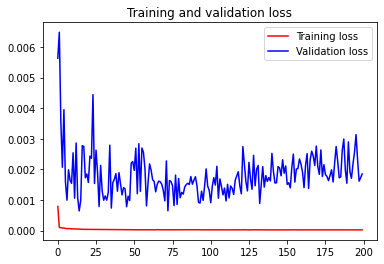

<Figure size 432x288 with 0 Axes>

In [113]:
### Plotting Loss vs Validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [114]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((1518, 1), (1007, 1))

In [115]:
# Model Evaluation
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [116]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  305.7975806207818
Train data MSE:  93512.16031352353
Train data MAE:  163.82631614355083
-------------------------------------------------------------------------------------
Test data RMSE:  2895.9074426016405
Test data MSE:  8386279.916115574
Test data MAE:  1855.4898256662418


In [117]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9941422584815363
Test data explained variance regression score: 0.9841284692801349


In [118]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.993795405825341
Test data R2 score: 0.9763797150583973


In [119]:
## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.014363888660327489
Test data MGD:  0.004638124886505253
----------------------------------------------------------------------
Train data MPD:  14.338200251580039
Test data MPD:  184.2416296063042


In [120]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2557, 1)
Test predicted data:  (2557, 1)
